In [1]:
from functions import *
import matplotlib.pyplot as plt
import pickle
from parameters_eigen import *

In [5]:
pf_corr = 0.15
E0 = 0.0001
substract_initial_reflection = False
reflections = True
sigma = 90
pulse_shape = 'gauss'
pulse_strength = E0_from_power(E0, pf_corr, sigma, gamma_rep, w_t, w_p, n_medium, substract_initial_reflection) 
abs_1RT = []
abs_LB = []
z_2s = []#
i = 0
for z_2 in z_2s:
    i+=1
    with open('results/eigen/Qdim=700_Qmax=1.5_power0.0001_true_E_conversion_pf_corr=0.15_n_wells10_z2{}_reflectionsTrue_quadratic_grid_polarizations.pickle'.format(z_2), 'rb') as input_file:
        pol_linear = pickle.load(input_file)     
    abs_1RT.append(get_absorption_MQW(pol_linear, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, z_2, spacing, spacing_0, omega_0, reflections, pulse_shape, method = '1-R-T'))
    abs_LB.append(get_absorption_MQW(pol_linear, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, z_2, spacing, spacing_0, omega_0, reflections, pulse_shape, method = 'lambert_beer'))
    print('done {}/{}'.format(i, len(z_2s)))

***Get absorption maximum and linewidth in dependence of z2***

In [6]:
pf_corr = 0.15
E0 = 0.000001
substract_initial_reflection = False
reflections = True
sigma = 90
pulse_shape = 'gauss'
pulse_strength = E0_from_power(E0, pf_corr, sigma, gamma_rep, w_t, w_p, n_medium, substract_initial_reflection) 
z_2s = [500019.0, 500029.0]
i = 0
for z_2 in z_2s:
    i+=1
    with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_n_wells10_z2{}_reflectionsTrue_quadratic_grid_polarizations.pickle'.format(z_2), 'rb') as input_file:
        pol_linear = pickle.load(input_file)     
    abs_1RT = get_absorption_MQW(pol_linear, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, z_2, spacing, spacing_0, omega_0, reflections, pulse_shape, method = '1-R-T')
    #abs_LB.append(get_absorption_MQW(pol_linear, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, z_2, spacing, spacing_0, omega_0, reflections, pulse_shape, method = 'lambert_beer'))
    with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_n_wells10_z{}_reflectionsTrue_quadratic_grid_absorption_1RT.pickle'.format(z_2), 'wb') as output_file:
        pickle.dump(abs_1RT, output_file)
    print('done {}/{}'.format(i, len(z_2s)))

done 1/2
done 2/2


In [7]:
abs_1RT = []
z_2s = [499984.0, 499998.0, 500012.0, 500019.0, 500026.0, 500029.0, 500036.0, 500045.0, 500052.0, 500059.0, 500066.0, 500073.0, 500082.0, 500089.0 ,500094.0, 500103.0 , 500111.0]
i = 0
for z_2 in z_2s:
    i+=1
    with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_n_wells10_z{}_reflectionsTrue_quadratic_grid_absorption_1RT.pickle'.format(z_2), 'rb') as input_file:
        abs_1RT.append(pickle.load(input_file))    
    print(z_2s[i-1], np.shape(abs_1RT[i-1])) 

499984.0 (1000,)
499998.0 (1000,)
500012.0 (1000,)
500019.0 (1000,)
500026.0 (1000,)
500029.0 (1000,)
500036.0 (1000,)
500045.0 (1000,)
500052.0 (1000,)
500059.0 (1000,)
500066.0 (1000,)
500073.0 (1000,)
500082.0 (1000,)
500089.0 (1000,)
500094.0 (1000,)
500103.0 (1000,)
500111.0 (1000,)


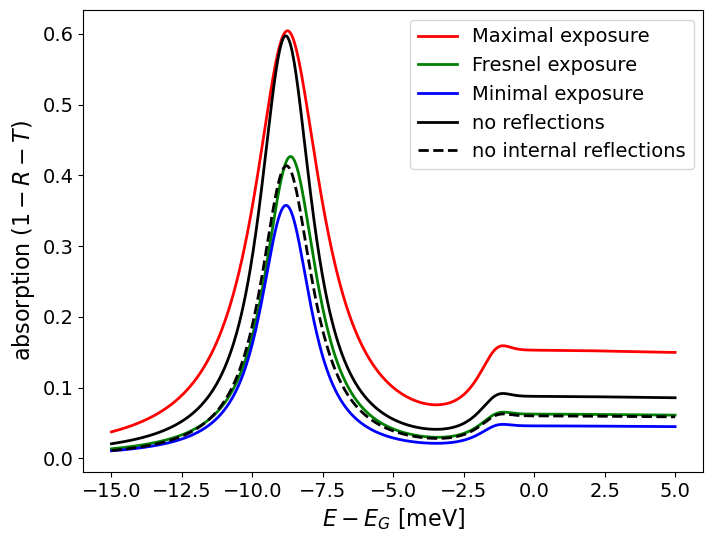

In [8]:
colors = ['red', 'green', 'blue']
labels = ['Maximal exposure', 'Fresnel exposure', 'Minimal exposure']
plt.figure(figsize=(8, 6))
for i, z_2 in enumerate([500045.0, 500082.0, 500111.0]):
    #plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_1RT[z_2s.index(z_2)], '-', label = r'$d_{GaAs}$'+' = {}'.format(int(z_2))+r'$\,$nm', color = colors[i], linewidth = 2)
    plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_1RT[z_2s.index(z_2)], '-', label = labels[i], color = colors[i], linewidth = 2)

pf_corr = 0.15
E0 = 0.000001
substract_initial_reflection = True
reflections = False
sigma = 90
pulse_shape = 'gauss'
pulse_strength = E0_from_power(E0, pf_corr, sigma, gamma_rep, w_t, w_p, n_medium, substract_initial_reflection) 
with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_n_wells10_z2500082.0_reflectionsFalse_quadratic_grid_polarizations.pickle', 'rb') as input_file:
    pol_linear = pickle.load(input_file)     
no_refls = get_absorption_MQW(pol_linear, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, 2500082.0, spacing, spacing_0, omega_0, False, pulse_shape, method = '1-R-T', fresnel = False)
fresnel_refls = get_absorption_MQW(pol_linear, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, 2500082.0, spacing, spacing_0, omega_0, False, pulse_shape, method = '1-R-T', fresnel = True)
plt.plot(1000* hbar*(omega_list- 0.012903883497007542), no_refls, '-', label = 'no reflections', color = 'black', linewidth = 2)
plt.plot(1000* hbar*(omega_list- 0.012903883497007542), fresnel_refls, '--', label = 'no internal reflections', color = 'black', linewidth = 2)
plt.xlabel(r'$E-E_G$ [meV]', fontsize = 16)
plt.ylabel(r'absorption $(1-R-T)$', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('absorptions_1-R-T_d_cv=0.76.pdf', bbox_inches = 'tight')

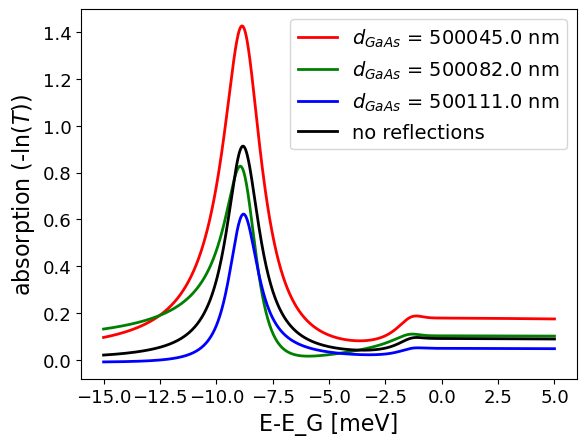

In [61]:
colors = ['red', 'green', 'blue']
method = 'lambert_beer'
pf_corr = 0.15
E0 = 0.0001
substract_initial_reflection = False
reflections = True
sigma = 90
pulse_shape = 'gauss'
pulse_strength = E0_from_power(E0, pf_corr, sigma, gamma_rep, w_t, w_p, n_medium, substract_initial_reflection) 
for i, z_2 in enumerate([500045.0, 500082.0, 500111.0]):
    with open('results/eigen/Qdim=700_Qmax=1.5_power0.0001_true_E_conversion_pf_corr=0.15_n_wells10_z2{}_reflectionsTrue_quadratic_grid_polarizations.pickle'.format(z_2), 'rb') as input_file:
        pol_linear = pickle.load(input_file)     
    abs = get_absorption_MQW(pol_linear, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, z_2, spacing, spacing_0, omega_0, reflections, pulse_shape, method)
    plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs, '-', label = r'$d_{GaAs}$'+' = {} nm'.format(z_2), color = colors[i], linewidth = 2)

pf_corr = 0.15
E0 = 0.000001 
substract_initial_reflection = True
reflections = False
sigma = 90
pulse_shape = 'gauss'
pulse_strength = E0_from_power(E0, pf_corr, sigma, gamma_rep, w_t, w_p, n_medium, substract_initial_reflection)
with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_n_wells10_z2500082.0_reflectionsFalse_quadratic_grid_polarizations.pickle', 'rb') as input_file:
    pol_linear = pickle.load(input_file)     
no_refls = get_absorption_MQW(pol_linear, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, 2500082.0, spacing, spacing_0, omega_0, False, pulse_shape, method)
plt.plot(1000* hbar*(omega_list- 0.012903883497007542), no_refls, '-', label = 'no reflections', color = 'black', linewidth = 2)
plt.xlabel(r'E-E_G [meV]', fontsize = 16)
plt.ylabel(r'absorption (-ln($T$))', fontsize = 16)
plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.legend(fontsize = 14)
plt.savefig('absorptions_ln(T)_d_cv=0.76.pdf', bbox_inches = 'tight')

In [10]:
from scipy.optimize import curve_fit

# Define the Lorentzian function
def lorentzian(x, x0, gamma, a):
    """
    Lorentzian function.
    x : array-like
        The independent variable (e.g., wavelength or energy).
    x0 : float
        The peak position of the Lorentzian.
    gamma : float
        The FWHM (full width at half maximum).
    a : float
        The amplitude (height of the peak).
    """
    return a * (gamma**2 / ((x - x0)**2 + gamma**2))

# Simulated example data (replace with your actual absorption spectrum)
x_data = 1000* hbar*(omega_list- 0.012903883497007542)  # Wavelengths (e.g., in nm)
peak_positions = []
gammas = []
amplitudes = []
for i, z_2 in enumerate(z_2s):
    # Fit the Lorentzian function to the data
    initial_guess = [-8.5, 0.001, 0.5]  # Initial guesses for x0, gamma, and a
    params, covariance = curve_fit(lorentzian, x_data, abs_1RT[i], p0=initial_guess)

    # Extract fitted parameters
    peak_positions.append(params[0])
    gammas.append(params[1])
    amplitudes.append(params[2])

# Generate the fitted curve
#y_fit = lorentzian(x_data, fitted_x0, fitted_gamma, fitted_a)

# Plot the results
#plt.figure(figsize=(8, 6))
#plt.plot(x_data, abs_1RT[i], 'b.', label="Data")
#plt.plot(x_data, y_fit, 'r-', label="Fitted Lorentzian")
#plt.xlabel("Wavelength (nm)")
#plt.ylabel("Absorbance")
#plt.title("Lorentzian Fit to Absorption Spectrum")
#plt.legend()
#plt.show()


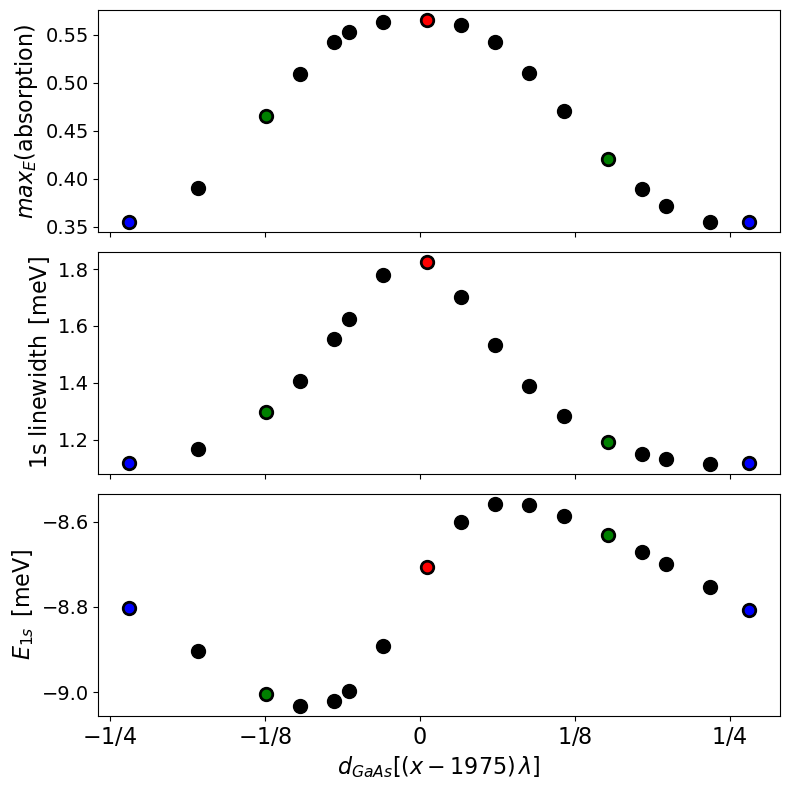

In [11]:
E_0 = 1
z_0 = 500015
colors = ['red','blue', 'green']
z_low = z_0 - np.pi*c/(omega_0*n_medium)
z_high = z_0 + np.pi*c/(omega_0*n_medium)
z_2 = np.linspace(z_low, z_high, 1000)
reflection = []
transmission = []
#E0_t = gauss_pulse(tlist, E_0, sigma=sigma, t_center=t_c)
E0_w = 1#fouriertrafo(E0_t,tlist=tlist,omega_list=omega_list)[325]
for z2 in z_2:
    R,T = reflection_transmission(omega_0 = omega_0, n_medium = n_medium, n_surrounding = n_surrounding, E0_w = E0_w, reflections = True,z_2 = z2)
    reflection.append(R)
    transmission.append(T)
# Create a figure and axes for the subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex = True, figsize=(8, 8))  # 3 rows, 1 column

ax1.scatter(z_2s, amplitudes, color = 'black', s = 100)
ax1.scatter(500045, amplitudes[z_2s.index(500045.0)],color = 'red', label = 'maximal exposition')
ax1.scatter(499984, amplitudes[z_2s.index(499984.0)],color = 'blue', label = 'minimal exposition')
ax1.scatter(500111, amplitudes[z_2s.index(500111.0)],color = 'blue')
ax1.scatter(500012, amplitudes[z_2s.index(500012.0)],color = 'green', label = 'Fresnel exposition')
ax1.scatter(500082, amplitudes[z_2s.index(500082.0)],color = 'green')
#ax1.set_xlabel (r'$d_{GaAs}\,$[nm]', fontsize = 14)
ax1.set_ylabel (r'$max_E$(absorption)', fontsize = 16)
ax1.tick_params(axis='y', labelsize=14)

ax2.scatter(z_2s, gammas, color = 'black', s = 100)
ax2.scatter(500045, gammas[z_2s.index(500045.0)],color = 'red', label = 'maximal exposition')
ax2.scatter(499984, gammas[z_2s.index(499984.0)],color = 'blue', label = 'minimal exposition')
ax2.scatter(500111, gammas[z_2s.index(500111.0)],color = 'blue')
ax2.scatter(500012, gammas[z_2s.index(500012.0)],color = 'green', label = 'Fresnel exposition')
ax2.scatter(500082, gammas[z_2s.index(500082.0)],color = 'green')
#ax2.xlabel (r'$d_{GaAs}\,$[nm]', fontsize = 14)
ax2.set_ylabel (r'1s linewidth $\,$[meV]', fontsize = 16)
ax2.tick_params(axis='y', labelsize=14)

ax3.scatter(z_2s, peak_positions, color = 'black', s = 100)
ax3.scatter(500045, peak_positions[z_2s.index(500045.0)],color = 'red', label = 'maximal exposition')
ax3.scatter(499984, peak_positions[z_2s.index(499984.0)],color = 'blue', label = 'minimal exposition')
ax3.scatter(500111, peak_positions[z_2s.index(500111.0)],color = 'blue')
ax3.scatter(500012, peak_positions[z_2s.index(500012.0)],color = 'green', label = 'Fresnel exposition')
ax3.scatter(500082, peak_positions[z_2s.index(500082.0)],color = 'green')
#ax3.set_xlabel (r'$d_{GaAs}\,$[nm]', fontsize = 16)
plt.xlabel('$d_{GaAs} [(x - 1975)\,\lambda]$', fontsize = 16)
ax3.set_ylabel (r'$E_{1s}\,$ [meV]', fontsize = 16)
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
z_labels = np.linspace(499980, 500107, 5) 
ax3.set_xticks(z_labels) #absolute z2 values on x-axis
ax3.set_xticklabels([r'$-1/4$',r'$-1/8$',r'$0$',r'$1/8$', r'$1/4$'], fontsize = 16)

plt.tight_layout()
plt.savefig('max_gamma_1s_(z2).pdf', bbox_inches = 'tight')

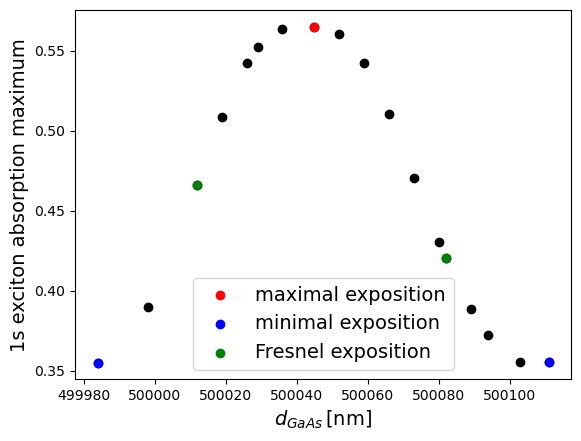

In [9]:
plt.scatter(z_2s, amplitudes, color = 'black')
plt.scatter(500045, amplitudes[z_2s.index(500045.0)],color = 'red', label = 'maximal exposition')
plt.scatter(499984, amplitudes[z_2s.index(499984.0)],color = 'blue', label = 'minimal exposition')
plt.scatter(500111, amplitudes[z_2s.index(500111.0)],color = 'blue')
plt.scatter(500012, amplitudes[z_2s.index(500012.0)],color = 'green', label = 'Fresnel exposition')
plt.scatter(500082, amplitudes[z_2s.index(500082.0)],color = 'green')
plt.xlabel (r'$d_{GaAs}\,$[nm]', fontsize = 14)
plt.ylabel (r'1s exciton absorption maximum', fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('max_abs(z2).pdf', bbox_inches = 'tight')


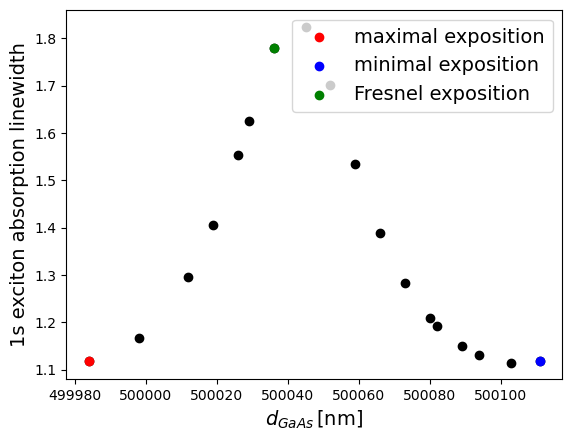

In [7]:
plt.scatter(z_2s, gammas, color = 'black')
plt.scatter(z_2s[0], gammas[0],color = 'red', label = 'maximal exposition')
plt.scatter(z_2s[-1], gammas[-1],color = 'blue', label = 'minimal exposition')
plt.scatter(z_2s[6], gammas[6],color = 'green', label = 'Fresnel exposition')
plt.xlabel (r'$d_{GaAs}\,$[nm]', fontsize = 14)
plt.ylabel (r'1s exciton absorption linewidth', fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('gamma(z2).pdf', bbox_inches = 'tight')

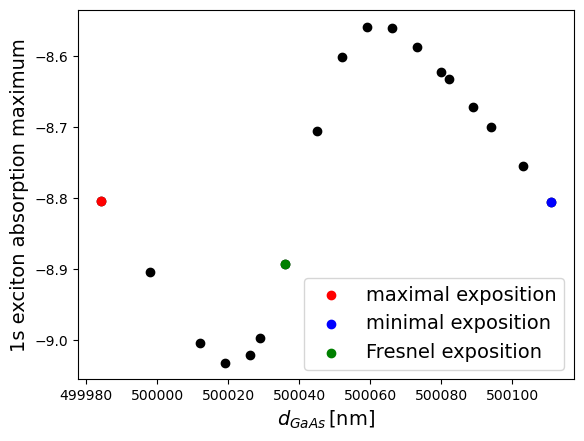

In [9]:
plt.scatter(z_2s, peak_positions, color = 'black')
plt.scatter(z_2s[0], peak_positions[0],color = 'red', label = 'maximal exposition')
plt.scatter(z_2s[-1], peak_positions[-1],color = 'blue', label = 'minimal exposition')
plt.scatter(z_2s[6], peak_positions[6],color = 'green', label = 'Fresnel exposition')
plt.xlabel (r'$d_{GaAs}\,$[nm]', fontsize = 14)
plt.ylabel (r'1s exciton absorption maximum', fontsize = 14)
plt.legend(fontsize = 14)
#plt.savefig('max_abs(z2).pdf', bbox_inches = 'tight')

In [7]:
file_path = '2022-05-23 26795 Linabs and Pump.txt'
start = 350
stop = 930

# Load the data from the .txt file into a NumPy array
data = np.loadtxt(file_path)

# If you want to access individual columns, you can slice the array:
energy = data[:, 0][start:stop]
omegas = energy/hbar
absorption = data[:, 1][start:stop]
pulse = data[:, 2][start:stop]

In [11]:
colors = ['red','green','blue']
for i, z_2 in enumerate(z_2s):
    plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_1RT[i], '-', color = colors[i], label = 'z_2 = {}, 1-R-T'.format(z_2))
    plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_LB[i], '--', color = colors[i], label = 'z_2 = {}, LB'.format(z_2))
plt.plot(1000*(energy-1.476), absorption,label = 'data')
plt.xlabel('energy [meV]')
plt.ylabel('absorption (1-R-T)')
plt.legend()
plt.savefig('absorptions_1-R-T_d_cv=0.76.pdf', bbox_inches = 'tight')

NameError: name 'z_2s' is not defined

/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


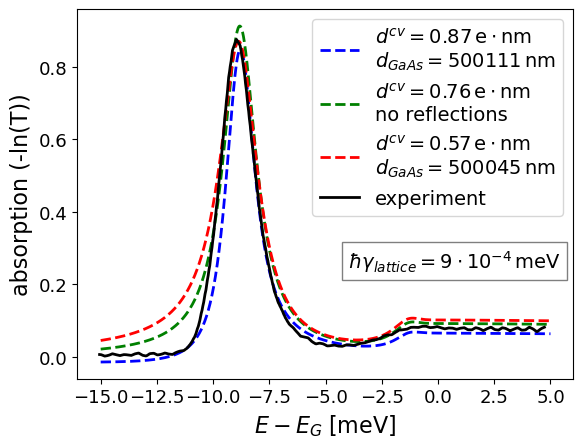

In [10]:
with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_d_cv=0.61_n_wells10_z2500045.0_reflectionsTrue_quadratic_grid_absorption.pickle', 'rb') as input_file:
    abs_45_61 = pickle.load(input_file)   
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_45_61, label = 'd_cv = 0.61', color = 'red')
with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_d_cv=0.45_n_wells10_z2500045.0_reflectionsTrue_quadratic_grid_absorption.pickle', 'rb') as input_file:
    abs_45_45 = pickle.load(input_file)  
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_45_45, label = 'd_cv = 0.45', color = 'red') 
with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_d_cv=0.57_n_wells10_z2500045.0_reflectionsTrue_quadratic_grid_absorption.pickle', 'rb') as input_file:
    abs_45_57 = pickle.load(input_file)   
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_45_57,'--', label = r'$d^{cv} = 0.57\,\text{nm}$'+'\n'+ r'$d_{GaAs} = 500045\,\text{e}\cdot\text{nm}$', color = 'red', linewidth = 2)
with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_d_cv=0.93_n_wells10_z2500111.0_reflectionsTrue_quadratic_grid_absorption.pickle', 'rb') as input_file:
    abs_111_93 = pickle.load(input_file)   
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_45_61, label = 'd_cv = 0.93', color = 'blue')
with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_d_cv=1.102_n_wells10_z2500111.0_reflectionsTrue_quadratic_grid_absorption.pickle', 'rb') as input_file:
    abs_111_110 = pickle.load(input_file)   
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_111_110, label = 'd_cv = 1.102', color = 'blue')
with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_d_cv=0.93_gamma1_n_wells10_z2500111.0_reflectionsTrue_quadratic_grid_absorption.pickle', 'rb') as input_file:
    abs_111_88_1 = pickle.load(input_file)   
#plt.plot(1000* hbar*(omega_list- 0.0131), abs_111_88_1, label = r'$d_{cv} = 0.93; \hbar\gamma=1$', color = 'blue')
with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_d_cv=0.87_n_wells10_z2500111.0_reflectionsTrue_quadratic_grid_absorption.pickle', 'rb') as input_file:
    abs_111_87 = pickle.load(input_file)   
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_111_87, '--', label = r'$d^{cv} = 0.87\,\text{nm}$'+'\n'+ r'$d_{GaAs} = 500111\,\text{e}\cdot\text{nm}$', color = 'blue', linewidth = 2)
with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_d_cv=0.88_n_wells10_z2500111.0_reflectionsTrue_quadratic_grid_absorption.pickle', 'rb') as input_file:
    abs_111_88 = pickle.load(input_file)   
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_111_88, '--', label = r'$d^{cv} = 0.88\,\text{nm}$'+'\n'+ r'$d_{GaAs} = 500111\,\text{nm}$', color = 'blue', linewidth = 2)
with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_d_cv=0.88_n_wells10_z2500111.0_reflectionsTrue_quadratic_grid_polarizations.pickle', 'rb') as input_file:
    pol_111_88 = pickle.load(input_file) 
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542),get_absorption_MQW(pol_111_87, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, z_2, spacing, spacing_0, omega_0, reflections, pulse_shape, method = '1-R-T'), label = '1-R-T')
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542),get_absorption_MQW(pol_111_88, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, z_2, spacing, spacing_0, omega_0, reflections, pulse_shape, method = 'lambert_beer'), label = 'lambert_beer')

pf_corr = 0.15
E0 = 0.000001
substract_initial_reflection = True
reflections = False
sigma = 90
pulse_shape = 'gauss'
pulse_strength = E0_from_power(E0, pf_corr, sigma, gamma_rep, w_t, w_p, n_medium, substract_initial_reflection) 

energyresolution = 1000
E_start = -0.015 + 0.012903883497007542 * hbar
E_stop = 0.005 + 0.012903883497007542 * hbar
omega_list = np.linspace(E_start/hbar,E_stop/hbar,energyresolution)


with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_n_wells10_z2500082.0_reflectionsFalse_quadratic_grid_polarizations.pickle', 'rb') as input_file:
    pol_10w = pickle.load(input_file) 
#log10w = get_absorption_MQW(pol_10w, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, z_2, spacing, spacing_0, omega_0, False, pulse_shape, method = 'lambert_beer')

with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_d_cv=0.87_n_wells10_z2500111.0_reflectionsTrue_quadratic_grid_polarizations.pickle', 'rb') as input_file:
    pol_111_87 = pickle.load(input_file) 
#abs_111_87 = get_absorption_MQW(pol_111_87, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, 500111.0, spacing, spacing_0, omega_0, reflections, pulse_shape, method = 'lambert_beer')
plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_111_87, '--', label = r'$d^{cv} = 0.87\,\text{e}\cdot\text{nm}$'+'\n'+ r'$d_{GaAs} = 500111\,\text{nm}$', color = 'blue', linewidth = 2)
plt.plot(1000* hbar*(omega_list- 0.012903883497007542), log10w, '--', label = r'$d^{cv} = 0.76\,\text{e}\cdot\text{nm}$'+'\n'+ r'no reflections', color = 'green', linewidth = 2)
with open('results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_d_cv=0.57_n_wells10_z2500045.0_reflectionsTrue_quadratic_grid_polarizations.pickle', 'rb') as input_file:
    pol_45_57 = pickle.load(input_file) 
#abs_45_57 = get_absorption_MQW(pol_45_57, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, 500045.0, spacing, spacing_0, omega_0, reflections, pulse_shape, method = 'lambert_beer')
plt.plot(1000* hbar*(omega_list- 0.012903883497007542), abs_45_57,'--', label = r'$d^{cv} = 0.57\,\text{e}\cdot\text{nm}$'+'\n'+ r'$d_{GaAs} = 500045\,\text{nm}$', color = 'red', linewidth = 2)
plt.plot(1000*(energy-1.476), absorption,'k',label = 'experiment', linewidth = 2)
plt.xlabel(r'$E-E_G\;$[meV]', fontsize = 16)
plt.xticks([-15, -10, -5, 0, 5],fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('absorption (-ln(T))', fontsize = 16)
textstr = r"$\hbar\gamma_{lattice} = 9\cdot10^{-4}\,$meV "
props = dict(facecolor='white', alpha=0.5)
plt.text(-4, 0.3, textstr, fontsize=14,
        verticalalignment='top', bbox=props)
plt.legend(fontsize = 14)
plt.savefig('max_min_d_cv_reflections.pdf', bbox_inches = 'tight')

In [5]:
pf_corr = 0.15
E0 = 0.000001
substract_initial_reflection = True
reflections = False
sigma = 90
pulse_shape = 'gauss'
pulse_strength = E0_from_power(E0, pf_corr, sigma, gamma_rep, w_t, w_p, n_medium, substract_initial_reflection) 

with open('/home/olivervoigt2/new_absorption_18.11./MQW/results/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_n_wells10_z2500082.0_reflectionsFalse_quadratic_grid_polarizations.pickle', 'rb') as input_file:
    pol_10w = pickle.load(input_file) 
log10w = get_absorption_MQW(pol_10w, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, 500082, spacing, spacing_0, omega_0, reflections, pulse_shape, method = 'lambert_beer')
RT10w = get_absorption_MQW(pol_10w, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, 500082, spacing, spacing_0, omega_0, reflections, pulse_shape, method = '1-R-T')


with open('/home/olivervoigt2/new_absorption_18.11./MQWresults/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_n_wells1_z2500012.0_reflectionsFalse_quadratic_grid_polarizations.pickle', 'rb') as input_file:
    pol_1w = pickle.load(input_file)[0] 
#log1w = get_absorption_MQW(pol_1w, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, z_2, spacing, spacing_0, omega_0, reflections, pulse_shape, method = 'lambert_beer')
#RT1w = get_absorption_MQW(pol_1w, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, z_2, spacing, spacing_0, omega_0, reflections, pulse_shape, method = '1-R-T')
log1w = get_absorption_SQW(pol_1w, t_c, tlist,omega_list, pulse_strength, sigma, omega_0, n_medium, pulse_shape = 'gauss', method = 'lambert_beer')
RT1w = get_absorption_SQW(pol_1w, t_c, tlist,omega_list, pulse_strength, sigma, omega_0, n_medium, pulse_shape = 'gauss', method = '1-R-T')


FileNotFoundError: [Errno 2] No such file or directory: '/home/olivervoigt2/new_absorption_18.11./MQWresults/eigen/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_n_wells1_z2500012.0_reflectionsFalse_quadratic_grid_polarizations.pickle'

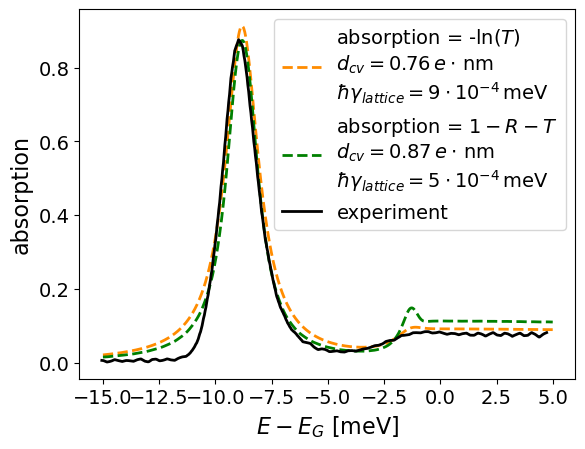

In [9]:

with open('/home/olivervoigt2/new_absorption_18.11./MQW/results/eigen/Qdim=700_Qmax=1.5_d_cv0.87_E00.00002_n_wells10_z2500320.0_reflectionsFalse_quadratic_grid_singlepulse_spectra_MQW.pickle', 'rb') as input_file:
    abs_alt= pickle.load(input_file)

#plt.plot(1000* hbar*(omega_list- 0.012903883497007542),RT10w,'-', label = '1-R-T; 10 wells', color = 'darkorange', linewidth = 2)
plt.plot(1000* hbar*(omega_list- 0.012903883497007542),log10w,'--', label = r'absorption = -ln($T$)'+'\n'+ r"$d_{cv} = 0.76\,e\cdot\,$nm" + '\n' + "$\hbar\gamma_{lattice} = 9\cdot10^{-4}\,$meV ", color = 'darkorange', linewidth = 2)

#plt.plot(1000* hbar*(omega_list- 0.012903883497007542),RT1w*10,'--', label = '10x(1-R-T); 1 well', color = 'darkorange', linewidth = 2)
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542),1-(1-RT1w)**10,'r--', label = '10*1W 1-R-T')
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542),log1w*10,'--', label = '10x(-ln(T)); 1 well', color = 'purple', linewidth = 2)
plt.plot(1000* hbar*(omega_list- 0.012903883497007542),abs_alt,'--', label = r'absorption = $1-R-T$'+'\n'+ r"$d_{cv} = 0.87\,e\cdot\,$nm" + '\n' + "$\hbar\gamma_{lattice} = 5\cdot10^{-4}\,$meV ", color = 'green', linewidth = 2)
plt.plot(1000*(energy-1.476), absorption,'k',label = 'experiment', linewidth = 2)
textstr = r"$d_{cv} = 0.76\,e\cdot\,$nm" +'\n'+ "$\hbar\gamma_{lattice} = 9\cdot10^{-4}\,$meV "
props = dict(facecolor='white', alpha=0.5)
#plt.text(-4, 0.3, textstr, fontsize=14,
       # verticalalignment='top', bbox=props)
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel(r'$E-E_G$ [meV]', fontsize = 16)
plt.ylabel('absorption', fontsize = 16)
plt.savefig('1RTvslnT_10W.pdf', bbox_inches = 'tight')

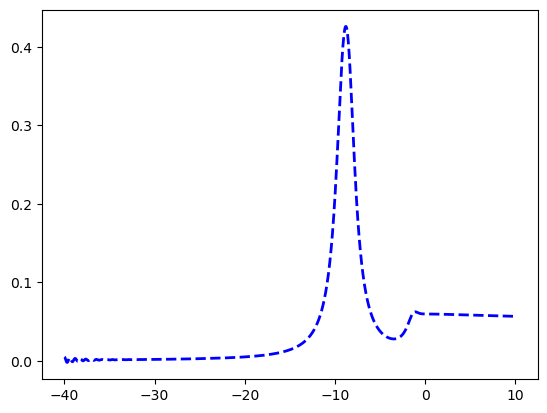

In [7]:
plt.plot(1000* hbar*(omega_list- 0.012903883497007542),RT10w,'-', label = '1-R-T; 10 wells', color = 'darkorange', linewidth = 2)
plt.plot(1000* hbar*(omega_list- 0.012903883497007542),log10w,'-', label = '-ln(T); 10 wells', color = 'purple', linewidth = 2)

plt.plot(1000* hbar*(omega_list- 0.012903883497007542),RT1w*10,'--', label = '10x(1-R-T); 1 well', color = 'darkorange', linewidth = 2)
#plt.plot(1000* hbar*(omega_list- 0.012903883497007542),1-(1-RT1w)**10,'r--', label = '10*1W 1-R-T')
plt.plot(1000* hbar*(omega_list- 0.012903883497007542),log1w*10,'--', label = '10x(-ln(T)); 1 well', color = 'purple', linewidth = 2)
plt.plot(1000*(energy-1.476), absorption,'k',label = 'experiment', linewidth = 2)
textstr = r"$d_{cv} = 0.76\,e\cdot\,$nm" +'\n'+ "$\hbar\gamma_{lattice} = 9\cdot10^{-4}\,$meV "
props = dict(facecolor='white', alpha=0.5)
plt.text(-4, 0.3, textstr, fontsize=14,
        verticalalignment='top', bbox=props)
plt.legend(fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel(r'$E-E_G$ [meV]', fontsize = 16)
plt.ylabel('absorption', fontsize = 16)
plt.savefig('1RTvslnT.pdf', bbox_inches = 'tight')

In [9]:
def lorentzian(x, x0, gamma, a):
    """
    Lorentzian function.
    x : array-like
        The independent variable (e.g., wavelength or energy).
    x0 : float
        The peak position of the Lorentzian.
    gamma : float
        The FWHM (full width at half maximum).
    a : float
        The amplitude (height of the peak).
    """
    return a * (gamma**2 / ((x - x0)**2 + gamma**2))

# Simulated example data (replace with your actual absorption spectrum)
x_data = 1000* hbar*(omega_list- 0.012903883497007542)  # Wavelengths (e.g., in nm)


    # Fit the Lorentzian function to the data
initial_guess = [-8.5, 0.001, 0.5]  # Initial guesses for x0, gamma, and a
params, covariance = curve_fit(lorentzian, x_data, no_refls, p0=initial_guess)

# Extract fitted parameters
print('peak position: ',params[0])
print('gamma: ',params[1])
print('amplitude: ', params[2])


peak position:  -8.806420210426113
gamma:  1.2075549543638837
amplitude:  0.5861286090777879


In [13]:
print(max(gammas))

1.824742942805538
